In this notebook, let's consider all the functionalities of langchain under the lense of how to be a more productive researcher.

In [8]:
# !pip install --upgrade langchain
# !pip install --upgrade langchain_experimental

# The LangChain Expression Language

In [21]:
# source: https://python.langchain.com/docs/expression_language/

In [22]:
# the basics: https://python.langchain.com/docs/expression_language/interface

# Leveraging Code Executionm

In [2]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.schema.output_parser import StrOutputParser
from langchain_experimental.utilities import PythonREPL

In [3]:
template = """Write some python code to solve the user's problem. 

Return only python code in Markdown format, e.g.:

```python
....
```"""
prompt = ChatPromptTemplate.from_messages([("system", template), ("human", "{input}")])

model = ChatOpenAI()

In [4]:
def _sanitize_output(text: str):
    _, after = text.split("```python")
    return after.split("```")[0]

In [5]:
chain = prompt | model | StrOutputParser() | _sanitize_output | PythonREPL().run

In [6]:
chain.invoke({"input": "whats 2 plus 2"})

Python REPL can execute arbitrary code. Use with caution.


'4\n'

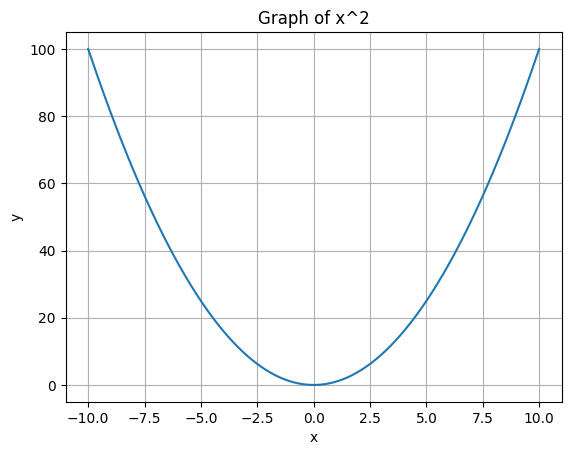

''

In [7]:
chain.invoke({"input": "Plot a graph of x squared"})

# Leveraging Tools

In [12]:
# !pip install duckduckgo-search

In [15]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts import ChatPromptTemplate
from langchain.schema.output_parser import StrOutputParser
from langchain.tools import DuckDuckGoSearchRun

In [16]:
search = DuckDuckGoSearchRun()

In [17]:
template = """turn the following user input into a search query for a search engine:

{input}"""
prompt = ChatPromptTemplate.from_template(template)

model = ChatOpenAI()

In [18]:
chain = prompt | model | StrOutputParser() | search

In [20]:
chain.invoke({"input": "I'd like to figure out UFC fights are happening this week"})

"MMA Junkie: CSAC suspends Bellator champ Usman Nurmagomedov for failed drug test; win over Brent Primus overturned ; MMA Weekly: UFC 295 Live Results: Prochazka vs. Pereira ; MMAFighting.com: UFC 295 video: Alex Pereira talks dealing with Jiri Prochazka's unique style, training with Dillon Danis ; MMAFighting.com: UFC 295's Diego Lopes wanted to fight Pat Sabatini before UFC, vows to ... Fight summary of UFC Fight Night: Almeida vs. Lewis from Ginasio Do Ibirapuera in Sao Paulo on November 4, 2023 on ESPN, including the main card and prelims. Saturday's fight card served as an electric send-off as the action and attention shifts to Abu Dhabi next week for UFC 294. From the opening fight to the final horn, it was another quality... The final quarter of the 2023 UFC schedule begins on Saturday night at the UFC APEX, as a dozen sets of competitors make the walk to the Octagon with designs on securing victory and setting... (UFC) UFC 295: Jiří Procházka vs. Alex Pereira Saturday, November

# Extracting Structured Information with Playwright

In [24]:
# see scripts in dev-scripts-playwright-langchain.py
# import pprint
# from langchain.text_splitter import RecursiveCharacterTextSplitter
# from langchain.document_loaders import AsyncChromiumLoader
# from langchain.document_transformers import BeautifulSoupTransformer
# from langchain.chains import create_extraction_chain
# from langchain.chat_models import ChatOpenAI

# def extract(content: str, schema: dict):
#     return create_extraction_chain(schema=schema, llm=llm).run(content)

# def scrape_with_playwright(urls, schema):
#     loader = AsyncChromiumLoader(urls)
#     docs = loader.load()
#     bs_transformer = BeautifulSoupTransformer()
#     docs_transformed = bs_transformer.transform_documents(docs, tags_to_extract=["span"])
#     print("Extracting content with LLM")

#     # Grab the first 1000 tokens of the site
#     splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=1000, chunk_overlap=0)
#     splits = splitter.split_documents(docs_transformed)

#     # Process the first split
#     extracted_content = extract(schema=schema, content=splits[0].page_content)
#     pprint.pprint(extracted_content)
#     return extracted_content

# schema = {
#     "properties": {
#         "news_article_title": {"type": "string"},
#         "news_article_summary": {"type": "string"},
#     },
#     "required": ["news_article_title", "news_article_summary"],
# }

# llm = ChatOpenAI(temperature=0, model="gpt-4-1106-preview")

# urls = ["<https://www.wsj.com>"]

# extracted_content = scrape_with_playwright(urls, schema=schema)

# print("Extracted content:")
# print(extracted_content)


# Automating Literature Review with LangChain

In [25]:
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(temperature=0, model="gpt-4-1106-preview")

In [31]:
# !pip3 install arxiv

In [34]:
from langchain.chat_models import ChatOpenAI
from langchain.agents import load_tools, initialize_agent, AgentType

llm = ChatOpenAI(temperature=0.0)
tools = load_tools(
    ["arxiv"],
)

agent_chain = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True,
)

In [35]:
agent_chain.run("What are the latest papers about leveraging large language models to augment human learning?")



> Entering new AgentExecutor chain...
I should search for recent papers on leveraging large language models to augment human learning.
Action: arxiv
Action Input: "leveraging large language models to augment human learning"
Observation: Published: 2021-06-02
Title: Not Far Away, Not So Close: Sample Efficient Nearest Neighbour Data Augmentation via MiniMax
Authors: Ehsan Kamalloo, Mehdi Rezagholizadeh, Peyman Passban, Ali Ghodsi
Summary: In Natural Language Processing (NLP), finding data augmentation techniques
that can produce high-quality human-interpretable examples has always been
challenging. Recently, leveraging kNN such that augmented examples are
retrieved from large repositories of unlabelled sentences has made a step
toward interpretable augmentation. Inspired by this paradigm, we introduce
Minimax-kNN, a sample efficient data augmentation strategy tailored for
Knowledge Distillation (KD). We exploit a semi-supervised approach based on KD
to train a model on augmented data.

'The latest papers about leveraging large language models to augment human learning are "Not Far Away, Not So Close: Sample Efficient Nearest Neighbour Data Augmentation via MiniMax," "Robotic Skill Acquisition via Instruction Augmentation with Vision-Language Models," and "Augmenting Autotelic Agents with Large Language Models."'

In [36]:
from langchain.utilities import ArxivAPIWrapper

In [37]:
arxiv = ArxivAPIWrapper()
docs = arxiv.run("1605.08386")
docs

'Published: 2016-05-26\nTitle: Heat-bath random walks with Markov bases\nAuthors: Caprice Stanley, Tobias Windisch\nSummary: Graphs on lattice points are studied whose edges come from a finite set of\nallowed moves of arbitrary length. We show that the diameter of these graphs on\nfibers of a fixed integer matrix can be bounded from above by a constant. We\nthen study the mixing behaviour of heat-bath random walks on these graphs. We\nalso state explicit conditions on the set of moves so that the heat-bath random\nwalk, a generalization of the Glauber dynamics, is an expander in fixed\ndimension.'

In [38]:
docs = arxiv.run("Kevin Ellis")
docs

"Published: 2020-06-15\nTitle: DreamCoder: Growing generalizable, interpretable knowledge with wake-sleep Bayesian program learning\nAuthors: Kevin Ellis, Catherine Wong, Maxwell Nye, Mathias Sable-Meyer, Luc Cary, Lucas Morales, Luke Hewitt, Armando Solar-Lezama, Joshua B. Tenenbaum\nSummary: Expert problem-solving is driven by powerful languages for thinking about\nproblems and their solutions. Acquiring expertise means learning these\nlanguages -- systems of concepts, alongside the skills to use them. We present\nDreamCoder, a system that learns to solve problems by writing programs. It\nbuilds expertise by creating programming languages for expressing domain\nconcepts, together with neural networks to guide the search for programs within\nthese languages. A ``wake-sleep'' learning algorithm alternately extends the\nlanguage with new symbolic abstractions and trains the neural network on\nimagined and replayed problems. DreamCoder solves both classic inductive\nprogramming tasks and

In [44]:
print(docs)

Published: 2020-06-15
Title: DreamCoder: Growing generalizable, interpretable knowledge with wake-sleep Bayesian program learning
Authors: Kevin Ellis, Catherine Wong, Maxwell Nye, Mathias Sable-Meyer, Luc Cary, Lucas Morales, Luke Hewitt, Armando Solar-Lezama, Joshua B. Tenenbaum
Summary: Expert problem-solving is driven by powerful languages for thinking about
problems and their solutions. Acquiring expertise means learning these
languages -- systems of concepts, alongside the skills to use them. We present
DreamCoder, a system that learns to solve problems by writing programs. It
builds expertise by creating programming languages for expressing domain
concepts, together with neural networks to guide the search for programs within
these languages. A ``wake-sleep'' learning algorithm alternately extends the
language with new symbolic abstractions and trains the neural network on
imagined and replayed problems. DreamCoder solves both classic inductive
programming tasks and creative tas

In [46]:
import arxiv

To automate literature review with Langchain, you can use the PubMedRetriever and PubMedLoader modules. Here's how you can do it:

• Install the required packages:

In [48]:
!pip3 install xmltodict # for the PubMedRetriever module.


[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [49]:
# Import the necessary modules:

from langchain.retrievers import PubMedRetriever #for the PubMedRetriever module.
from langchain.document_loaders import PubMedLoader #for the PubMedLoader module.

In [60]:
#• Create an instance of the PubMedRetriever:

retriever = PubMedRetriever()

In [71]:
# Use the PubMedRetriever to get relevant documents based on a search query:

query = "neurosscience of learning"
docs = retriever.get_relevant_documents(query)
docs

[]

In [67]:

# • Create an instance of the PubMedLoader:

loader = PubMedLoader(query)

# Load the documents using the PubMedLoader:

docs = loader.load()

In [68]:
# You can now access the loaded documents and their metadata:

docs #to access the metadata of the first document.

[Document(page_content='Institut George Lopez-1 (IGL-1) and Histidine-tryptophan-ketoglutarate (HTK) solutions are proposed as alternatives to UW (gold standard) in liver preservation. Their composition differs in terms of the presence/absence of oncotic agents such as HES or PEG, and is decisive for graft conservation before transplantation. This is especially so when fatty (steatotic) livers are used since these grafts are more vulnerable to ischemia insult during conservation. Their composition determines the extent of the subsequent reperfusion injury after transplantation. Aldehyde dehydrogenase-2 (ALDH2), a mitochondrial enzyme, has been reported to play a protective role in warm ischemia-reperfusion injury (IRI), but its potential in fatty liver cold ischemic injury has not yet been investigated. We evaluated the relevance of ALDH2 activity in cold ischemia injury when fatty liver grafts from Zucker Obese rats were preserved in UW, HTK, and IGL-1 solutions, in order to study the

In [69]:
docs[0].page_content #to access the content of the first document.

#By using the PubMedRetriever and PubMedLoader modules, you can automate the process of retrieving and loading relevant literature for your literature review.

'Institut George Lopez-1 (IGL-1) and Histidine-tryptophan-ketoglutarate (HTK) solutions are proposed as alternatives to UW (gold standard) in liver preservation. Their composition differs in terms of the presence/absence of oncotic agents such as HES or PEG, and is decisive for graft conservation before transplantation. This is especially so when fatty (steatotic) livers are used since these grafts are more vulnerable to ischemia insult during conservation. Their composition determines the extent of the subsequent reperfusion injury after transplantation. Aldehyde dehydrogenase-2 (ALDH2), a mitochondrial enzyme, has been reported to play a protective role in warm ischemia-reperfusion injury (IRI), but its potential in fatty liver cold ischemic injury has not yet been investigated. We evaluated the relevance of ALDH2 activity in cold ischemia injury when fatty liver grafts from Zucker Obese rats were preserved in UW, HTK, and IGL-1 solutions, in order to study the mechanisms involved. A

In [70]:
len(docs)

1

In [72]:
from langchain.tools import PubmedQueryRun

In [73]:
tool = PubmedQueryRun()

In [74]:
tool.run("chatgpt")

"Published: 2023-10-29\nTitle: Humans are still better than ChatGPT: Case of the IEEEXtreme competition.\nCopyright Information: © 2023 The Authors.\nSummary::\nSince the release of ChatGPT, numerous studies have highlighted the remarkable performance of ChatGPT, which often rivals or even surpasses human capabilities in various tasks and domains. However, this paper presents a contrasting perspective by demonstrating an instance where human performance excels in typical tasks suited for ChatGPT, specifically in the domain of computer programming. We utilize the IEEExtreme Challenge competition as a benchmark-a prestigious, annual international programming contest encompassing a wide range of problems with different complexities. To conduct a thorough evaluation, we selected and executed a diverse set of 102 challenges, drawn from five distinct IEEExtreme editions, using three major programming languages: Python, Java, and C++. Our empirical analysis provides evidence that contrary to 

With duck duck go search

In [87]:
import requests
from bs4 import BeautifulSoup
from dotenv import load_dotenv
from langchain.tools import Tool, DuckDuckGoSearchResults
from langchain.prompts import PromptTemplate
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType
from langchain.llms import OpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
import pandas as pd

In [91]:
ddg_search = DuckDuckGoSearchRun()

In [89]:
def parse_html(content):
    soup = BeautifulSoup(content, 'html.parser')
    text_content_with_links = soup.get_text()
    return text_content_with_links

def fetch_web_page(url):
    response = requests.get(url)
    return parse_html(response.content)

In [141]:
agent = initialize_agent([ddg_search],
                         llm=ChatOpenAI(temperature=0.0, model="gpt-4-1106-preview"),
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True)

In [142]:
output = agent.invoke({"input": "You are an expert researcher. What are the latest top 5 research papers about LLMs? Return the outputs in a list containing title, abstract and citation."})



> Entering new AgentExecutor chain...
To find the latest top 5 research papers about Large Language Models (LLMs), I will need to perform a search using an academic database or a search engine that can provide access to recent scientific publications. Since I have access to DuckDuckGo Search, I will use it to look for recent papers on LLMs, although it may not be as precise as a specialized academic search engine.

Action: duckduckgo_search
Action Input: latest research papers on Large Language Models 2023
Observation: A Survey of Large Language Models Wayne Xin Zhao, Kun Zhou, Junyi Li, Tianyi Tang, Xiaolei Wang, Yupeng Hou, Yingqian Min, Beichen Zhang, Junjie Zhang, Zican Dong, Yifan Du, Chen Yang, Yushuo Chen, Zhipeng Chen, Jinhao Jiang, Ruiyang Ren, Yifan Li, Xinyu Tang, Zikang Liu, Peiyu Liu, Jian-Yun Nie, Ji-Rong Wen Large Language Models (LLMs) have recently demonstrated remarkable capabilities in natural language processing tasks and beyond. This success of LLMs has led to a 

In [111]:
from langchain.chains.openai_functions.extraction import create_extraction_chain_pydantic
from langchain.chains.openai_functions.base import create_structured_output_chain

In [143]:
# Define a Pydantic schema for your data (modify according to your data structure)
from pydantic import BaseModel

class LiteratureData(BaseModel):
    title: str
    abstract: str
    citation: str

# Create a chain to extract information based on the schema
extraction_chain = create_extraction_chain_pydantic(
    pydantic_schema=LiteratureData,
    llm=ChatOpenAI(temperature=0, model="gpt-4-1106-preview"),  # specify the model you want to use
)

In [144]:
results = output["output"]
literature_data_output = extraction_chain.run(results)
df = pd.DataFrame([data.dict() for data in literature_data_output])
df.head()  # Displaying the first few rows of the DataFrame

,title,abstract,citation
0,A Survey of Large Language Models,This paper discusses the recent capabilities d...,Wayne Xin Zhao et al.
1,Unifying Large Language Models and Knowledge G...,"Submitted on 14 Jun 2023, this paper proposes ...",Shirui Pan et al.
2,Talking About Large Language Models,This paper reflects on the intersection of tec...,Murray Shanahan
3,Science in the age of large language models,This article discusses the implications of LLM...,"Abeba Birhane, Atoosa Kasirzadeh, David Leslie..."


In [124]:
# Alternative with create_structured_output_chain() and json_schema
# This example needs some work
# json_schema = {
#     "title": "Literature Review",
#     "description": "Structured output for a literature review",
#     "type": "object",
#     "properties":{
#             "author": {"title": "Author", "description": "Author of the paper", "type": "string"},
#             "abstract": {"title": "Abstract", "description": "Abstract of the paper", "type": "string"},
#             "citation": {"title": "Citation", "description": "Citation of the paper", "type": "string"},
#             "key_points": {"title": "Key Points", "description": "Key points of the paper if available", "type": "string"},
#             },
# "required": [],
# }

# llm = ChatOpenAI(model="gpt-4-1106-preview", temperature=0)
# prompt = ChatPromptTemplate.from_messages([("system", "You are extracting literature information in structured formats"),         ("human", "Use the given format to extract information from the following input: {input}")])

# chain = create_structured_output_chain(json_schema, llm, prompt, verbose=True)
# output = chain.run(literature_data_output)
# output
# output